# Credit Card Approval Project By Logistic Regression Technique through statsmodel Library

Steps involved in this project:

1.Reading the data and understanding it.

2.Data cleaning (getting rid of missing values if any)

3.Data Preprocessing(Converting categorical to numeric features,scaling and spliting the data)

4.Model building and Model fitting

5.Evaluation of model

#### 1.Reading and understanding the data

In [1]:
#importing basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [88]:
#reading the library
df=pd.read_csv('\cc_approvals.data',header=None)
#head view
df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


In [4]:
#tail vieww
df.tail(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


we can see missing values in form of '?'..

#### 2. Data Cleaning 

The features are a bit confusing as it is a credit card detail which is kept confedential so we have research and find the probable features in a typical credit card application--

Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income and finally the ApprovalStatus. 

In [90]:
#filling the columns name
df.columns=['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income' , 'ApprovalStatus']
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [9]:
df.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


###### Filling the missing values in numeric and non numerical features

In [97]:
#converting '?' to nan so it can easily be filled
df=df.replace('?',np.nan)
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

In [98]:
#filling null values in non-numeric features
for i in df:
    if(df[i].dtype=='object'):
        df=df.fillna(df[i].value_counts().index[0])

In [99]:
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

Now all null values are wiped off

#### 3.Data Preprocessing

##### Converting categorical varibles to numeric by LabelEncoder

In [101]:
#converting non numeric features to numeric
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df:
    if(df[col].dtypes=='object'):
        le.fit(df[col])
        df[col]=le.transform(df[col])
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,1,156,0.000,2,1,13,8,1.25,1,1,1,0,0,68,0,0
1,0,328,4.460,2,1,11,4,3.04,1,1,6,0,0,11,560,0
2,0,89,0.500,2,1,11,4,1.50,1,0,0,0,0,96,824,0
3,1,125,1.540,2,1,13,8,3.75,1,1,5,1,0,31,3,0
4,1,43,5.625,2,1,13,8,1.71,1,0,0,0,2,37,0,0


In [102]:
#dropping the column which we are not need of
df.drop(['DriversLicense','ZipCode'],axis=1,inplace=True)

##### Spliting data to train -test 

In [103]:
#importing train test split
from sklearn.model_selection import train_test_split

In [23]:
#dividing the data into dependent and independent varibles
y=df.pop('ApprovalStatus')
X=df


In [24]:
#performing train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.70,test_size=.30,random_state=42)


##### Scaling the data

In [27]:
#scaling the data through MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.fit_transform(X_test)

In [28]:
scaled_X_train=pd.DataFrame(scaled_X_train,columns=['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'Citizen', 'Income'])
scaled_X_test=pd.DataFrame(scaled_X_test,columns=['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'Citizen', 'Income'])
scaled_X_train.index=X_train.index
scaled_X_test.index=X_test.index

#### 4.Model building by statsmodel library

In [32]:
import statsmodels.api as sm

In [33]:
a=sm.add_constant(scaled_X_train)
res=sm.GLM(y_train,a,family=sm.families.Binomial()).fit()
pred_data=res.predict(a)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         ApprovalStatus   No. Observations:                  482
Model:                            GLM   Df Residuals:                      468
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -139.02
Date:                Sat, 21 Nov 2020   Deviance:                       278.03
Time:                        10:17:21   Pearson chi2:                     514.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.8305      0.979     -0.849      0.396      -2.749       1.088
Gender             0.1197      0.341      0.351      0.726      -0.549       0.789
Age                0.0662      0.626      0.106      0.916      -1.160       1.292
Debt               0.9561      0.832      1.149      0.250      -0.674       2.586
Married            9.7270      2.216      4.390      0.000       5.384      14.070
BankCustomer      -3.8517      1.356     -2.841      0.005      -6.509      -1.194
EducationLevel    -0.5863      0.501     -1.169      0.242      -1.569       0.396
Ethnicity         -0.8461      0.569     -1.487      0.137      -1.962       0.269
YearsEmployed     -2.9781      1.276     -2.333      0.020      -5.480      -0.477
PriorDefault      -4.0238      0.416     -9.678      0.000      -4.839      -3.209
Employed          -0.8057      0.427     -1.887      0.059      -1.643       0.031
CreditScore       -4.3868      4.085     -1.074      0.283     -12.394       3.620
Citizen            0.1362      0.613      0.222      0.824      -1.066       1.339
Income           -70.9191     21.234     -3.340      0.001    -112.537     -29.301
==================================================================================
"""

In [35]:
#predicting the data based on train data
table=pd.DataFrame({'actual':y_train.values, 'pred_Prob':pred_data})
table['pred_data']=table['pred_Prob'].map(lambda x:1 if x>.5 else 0)
table

,actual,pred_Prob,pred_data
178,0,0.103752,0
265,1,0.978459,1
352,1,0.796423,1
529,1,0.408046,0
409,1,0.897099,1
...,...,...,...
20,0,0.043474,0
71,1,0.186265,0
106,1,0.369774,0
270,0,0.344469,0


In [39]:
#predicting the accuracy score of the data
from sklearn.metrics import accuracy_score
accuracy_score(table['actual'],table['pred_data'])

0.8858921161825726

In [105]:
#looking at the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(table['actual'],table['pred_data'])

array([[192,  18],
       [ 37, 235]], dtype=int64)

In [106]:
#looking at the vif to eliminate the features which are degrading the perforamance of the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['features']=scaled_X_train.columns
vif['vif']=[variance_inflation_factor(scaled_X_train.values,i) for i in range(scaled_X_train.shape[1])]
vif

,features,vif
0,Gender,3.113609
1,Age,3.468985
2,Debt,2.130841
3,BankCustomer,3.223297
4,EducationLevel,3.179831
5,Ethnicity,4.645405
6,YearsEmployed,1.943522
7,PriorDefault,2.855271
8,Employed,2.923184
9,CreditScore,1.940361


Looks like Married column is highly correlated with other columns and just removing it to improve the performance of the model

In [68]:
#eliminating the column
scaled_X_train.drop('Married',axis=1,inplace=True)
scaled_X_test.drop('Married',axis=1,inplace=True)

KeyError: "['Married'] not found in axis"

In [46]:
#running the model again to see if the model accuracy imporved or not
a=sm.add_constant(scaled_X_train)
res=sm.GLM(y_train,a,family=sm.families.Binomial()).fit()
pred_data=res.predict(a)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         ApprovalStatus   No. Observations:                  482
Model:                            GLM   Df Residuals:                      469
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -148.87
Date:                Sat, 21 Nov 2020   Deviance:                       297.74
Time:                        10:18:11   Pearson chi2:                     490.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.6956      0.665      4.053      0.000       1.392       3.999
Gender             0.1123      0.331      0.339      0.735      -0.537       0.761
Age                0.1565      0.609      0.257      0.797      -1.038       1.351
Debt               1.1261      0.808      1.394      0.163      -0.457       2.709
BankCustomer       1.4997      0.546      2.749      0.006       0.431       2.569
EducationLevel    -0.2793      0.477     -0.585      0.558      -1.215       0.656
Ethnicity         -0.1172      0.533     -0.220      0.826      -1.162       0.928
YearsEmployed     -2.6235      1.240     -2.117      0.034      -5.053      -0.194
PriorDefault      -3.6622      0.366    -10.019      0.000      -4.379      -2.946
Employed          -0.7306      0.406     -1.798      0.072      -1.527       0.066
CreditScore       -4.7216      3.946     -1.197      0.231     -12.456       3.012
Citizen           -0.3088      0.574     -0.538      0.591      -1.434       0.817
Income           -64.4982     19.813     -3.255      0.001    -103.331     -25.665
==================================================================================
"""

In [47]:
#checking the accuracy of the model
accuracy_score(table['actual'],table['pred_data'])

0.8858921161825726

it seems that accuracy doesn't improve by a significant margin

In [48]:
#checking the vif again
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['features']=scaled_X_train.columns
vif['vif']=[variance_inflation_factor(scaled_X_train.values,i) for i in range(scaled_X_train.shape[1])]
vif

,features,vif
0,Gender,3.113609
1,Age,3.468985
2,Debt,2.130841
3,BankCustomer,3.223297
4,EducationLevel,3.179831
5,Ethnicity,4.645405
6,YearsEmployed,1.943522
7,PriorDefault,2.855271
8,Employed,2.923184
9,CreditScore,1.940361


So accuracy is almost same and vif is also good now so we will continue with this

In [49]:
table

,actual,pred_Prob,pred_data
178,0,0.103752,0
265,1,0.978459,1
352,1,0.796423,1
529,1,0.408046,0
409,1,0.897099,1
...,...,...,...
20,0,0.043474,0
71,1,0.186265,0
106,1,0.369774,0
270,0,0.344469,0


In [50]:
#checking the sensitivity and specificity also 
matrix=confusion_matrix(table['actual'],table['pred_data'])

TF=matrix[0,0]
FP=matrix[0,1]
FN=matrix[1,0]
TP=matrix[1,1]

#sensitivity
sensi=TP/(FN+TP)
print('sensitivity=',sensi)

#specificity
speci=TF/(TF+FP)
speci

sensitivity= 0.8639705882352942


0.9142857142857143

In [51]:
#checking the tpr and fpr as for a good model tpr should be high and fpr should be low
tpr=sensi
fpr=1-speci

##### So lets see the find the optimal cutoff for the model

In [107]:
#
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    table[i]= table.pred_Prob.map(lambda x: 1 if x > i else 0)
table

,actual,pred_Prob,pred_data,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
178,0,0.103752,0,1,1,0,0,0,0,0,0,0,0,0
265,1,0.978459,1,1,1,1,1,1,1,1,1,1,1,1
352,1,0.796423,1,1,1,1,1,1,1,1,1,0,0,1
529,1,0.408046,0,1,1,1,1,1,0,0,0,0,0,0
409,1,0.897099,1,1,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,0,0.043474,0,1,0,0,0,0,0,0,0,0,0,0
71,1,0.186265,0,1,1,0,0,0,0,0,0,0,0,0
106,1,0.369774,0,1,1,1,1,0,0,0,0,0,0,0
270,0,0.344469,0,1,1,1,1,0,0,0,0,0,0,0


In [54]:
#cheking the accuracy,sensitivity and specificity at each cutoff
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
for i in numbers:
    cm1 = confusion_matrix(table.actual, table[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.564315  1.000000  0.000000
0.1   0.1  0.738589  0.988971  0.414286
0.2   0.2  0.834025  0.963235  0.666667
0.3   0.3  0.875519  0.952206  0.776190
0.4   0.4  0.887967  0.908088  0.861905
0.5   0.5  0.885892  0.863971  0.914286
0.6   0.6  0.871369  0.823529  0.933333
0.7   0.7  0.865145  0.797794  0.952381
0.8   0.8  0.856846  0.783088  0.952381
0.9   0.9  0.842324  0.750000  0.961905


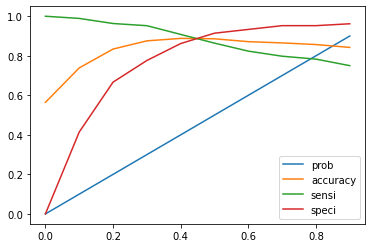

In [55]:
#plotting the optimal cutoff
cutoff_df.plot()

we have got the cutoff point we will take it as .42

In [56]:
#preparing our final predicted column
table['predicted']=table.pred_Prob.map(lambda x:1 if(x>.42) else 0)
print(table)
final=table[['actual','pred_Prob','predicted']]
final

,actual,pred_Prob,pred_data,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
178,0,0.103752,0,1,1,0,0,0,0,0,0,0,0,0
265,1,0.978459,1,1,1,1,1,1,1,1,1,1,1,1
352,1,0.796423,1,1,1,1,1,1,1,1,1,0,0,1
529,1,0.408046,0,1,1,1,1,1,0,0,0,0,0,0
409,1,0.897099,1,1,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,0,0.043474,0,1,0,0,0,0,0,0,0,0,0,0
71,1,0.186265,0,1,1,0,0,0,0,0,0,0,0,0
106,1,0.369774,0,1,1,1,1,0,0,0,0,0,0,0
270,0,0.344469,0,1,1,1,1,0,0,0,0,0,0,0


In [62]:
#the final performance matrics for out model
matrix=confusion_matrix(table['actual'],table['predicted'])

TF=matrix[0,0]
FP=matrix[0,1]
FN=matrix[1,0]
TP=matrix[1,1]

#sensitivity
sensi=TP/(FN+TP)
print('sensitivity=',sensi)

#specificity
speci=TF/(TF+FP)
print('specificity=',speci)
print('accuracy of the model is=',accuracy_score(final.actual,final.predicted))

sensitivity= 0.9044117647058824
specificity= 0.8761904761904762
accuracy of the model is= 0.8921161825726142
